Mining Super Lotto Plus Winning Numbers

Although lotteries are random via mechanical machines to avoid applying any algorithm in draws, some think they can crack the pattern and predict the next winning numbers.
Among different lottery drawings, one or two offer their past winning numbers in form of CSVs. California Super Lotto Plus is not among them. In this project, we scrape a website that updates the winning numbers after each draw and import winning numbers in the past year drawings in a DataFrame using Python and Pandas.
The related pictures in each section are in the pics folder with appropriate names. Explanations are provided in each cell in the form of comments.

In [1]:
%matplotlib inline               

import pandas as pd              #To a create frame containing data

import matplotlib.pyplot as plt  # To plot data in the form of different chart

import seaborn as sns            # An additional tool for plotting
sns.set_style("whitegrid")       # Styling the chart
sns.set_context("poster")

import requests                  # To connect the target website
from bs4 import BeautifulSoup    # A very handy tool to mine data

In [2]:
req = requests.get('https://www.lotteryusa.com/california/super-lotto-plus/year')
req                              # A response of 200 means the connection is successful

<Response [200]>

In [3]:
page = req.text                         # Here we see the content of the site in this notebook

In [4]:
soup = BeautifulSoup(page, 'lxml')               # Soup organizes the contents

By pressing F12 on your keyboard, you can open Chrome developer tools. (See F12 in pics folder)
As you moving your mouse on the element, the appropriate area becomes highlighted.
By opening each section, you see the specific section and class to be used in the code.
For example, date, numbers, and mega class are shown in the pics folder.

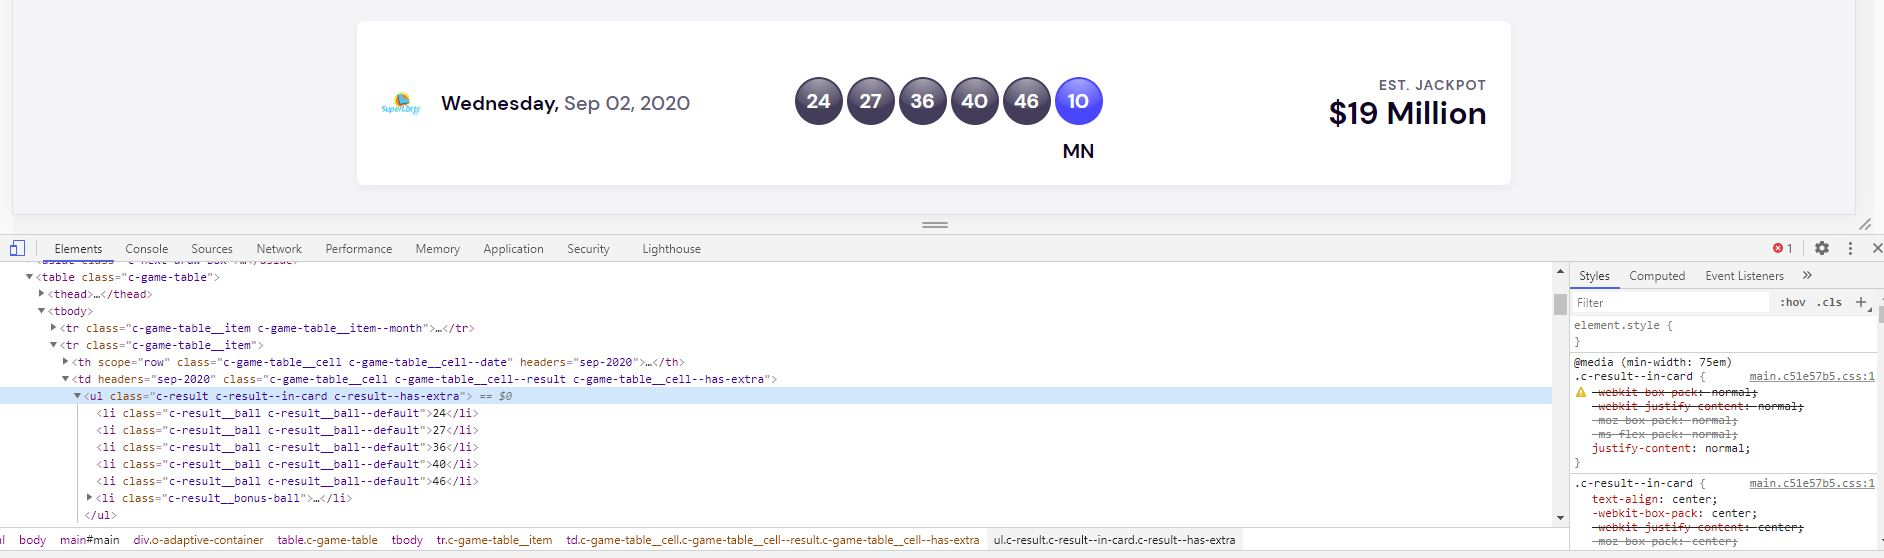

In [1]:
from IPython.display import Image #Allows us to import images in different format
Image('./pics/F12.JPG')

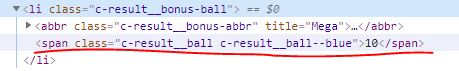

In [2]:
Image('./pics/mega class.JPG')

In [5]:
time = [t.text.replace('\n', '') for t in soup.find_all('time', {'class': 'c-game-table__game-date'})]
number = [n.text for n in soup.find_all('li', {'class':'c-result__ball c-result__ball--default'})] 
numbers = [number[i:i+5] for i in range(0, len(number), 5)]
mega = [m.text for m in soup.find_all('span', {'class':'c-result__ball c-result__ball--blue'})]

sepNum = pd.DataFrame(numbers)   # Here the list of numbers is divided into columns
data = {'one': sepNum[0],
        'two': sepNum[1],
        'three': sepNum[2],
        'four': sepNum[3],
        'five': sepNum[4],
        'mega': mega,
        'date': time}

df1 = pd.DataFrame(data)
df1.head()                       # head.() shows only the first five rows

,one,two,three,four,five,mega,date
0,24,27,36,40,46,10,"Wednesday, Sep 02, 2020"
1,5,10,29,42,46,2,"Saturday, Aug 29, 2020"
2,4,5,6,30,45,21,"Wednesday, Aug 26, 2020"
3,20,24,28,35,37,22,"Saturday, Aug 22, 2020"
4,11,13,14,16,39,26,"Wednesday, Aug 19, 2020"


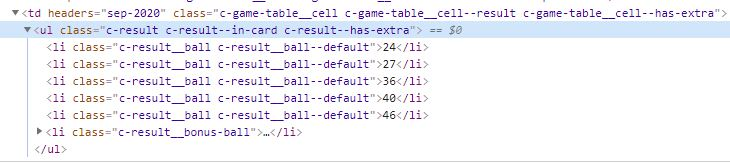

In [3]:
Image('./pics/numbers class.JPG')

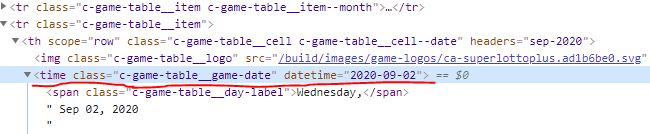

In [4]:
Image('./pics/time class.JPG')

In [6]:
df1.info()        # info() shows the number of columns, rows, types, and memory usage

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   one     105 non-null    object
 1   two     105 non-null    object
 2   three   105 non-null    object
 3   four    105 non-null    object
 4   five    105 non-null    object
 5   mega    105 non-null    object
 6   date    105 non-null    object
dtypes: object(7)
memory usage: 5.9+ KB


In [7]:
df1[['one','two','three','four','five','mega']] = df1[['one','two','three','four','five','mega']].astype('int')
df1.info()            # Here we change the type of digits into numbers(int)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   one     105 non-null    int32 
 1   two     105 non-null    int32 
 2   three   105 non-null    int32 
 3   four    105 non-null    int32 
 4   five    105 non-null    int32 
 5   mega    105 non-null    int32 
 6   date    105 non-null    object
dtypes: int32(6), object(1)
memory usage: 3.4+ KB


In [8]:
df1 = df1.loc[::-1].reset_index(drop = True)
df1                # reversing the items in columns and indexes

,one,two,three,four,five,mega,date
0,16,22,24,43,45,16,"Wednesday, Sep 04, 2019"
1,8,18,20,23,43,5,"Saturday, Sep 07, 2019"
2,4,6,15,24,46,6,"Wednesday, Sep 11, 2019"
3,4,10,18,27,30,7,"Saturday, Sep 14, 2019"
4,5,7,22,23,27,27,"Wednesday, Sep 18, 2019"
...,...,...,...,...,...,...,...
100,11,13,14,16,39,26,"Wednesday, Aug 19, 2020"
101,20,24,28,35,37,22,"Saturday, Aug 22, 2020"
102,4,5,6,30,45,21,"Wednesday, Aug 26, 2020"
103,5,10,29,42,46,2,"Saturday, Aug 29, 2020"


<AxesSubplot:>

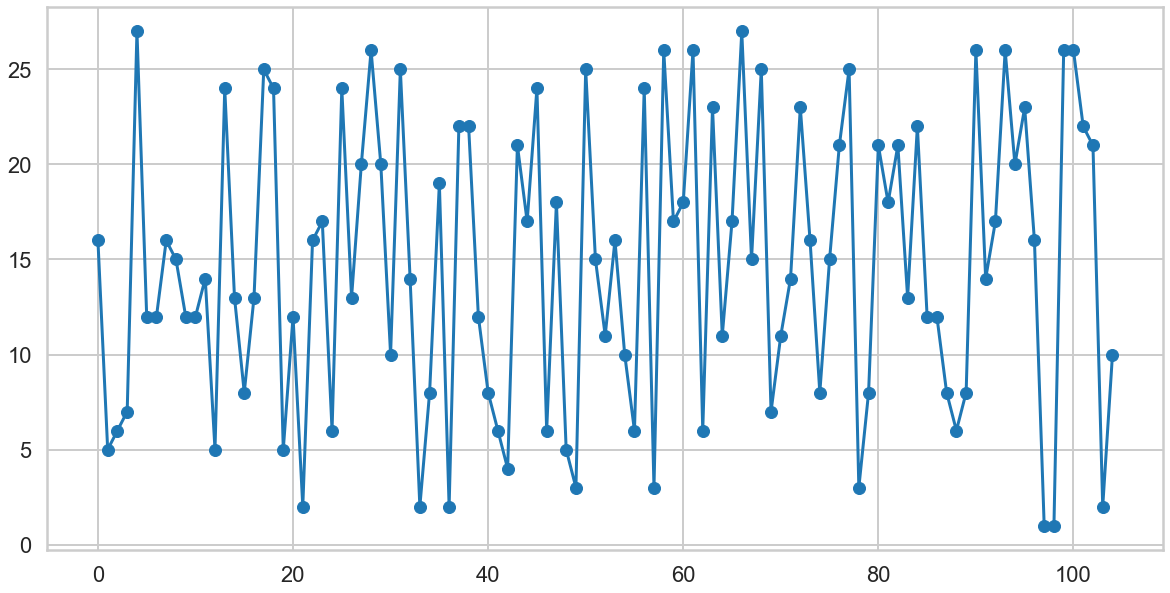

In [9]:
df1['mega'].iloc[::-1].plot(figsize=(20,10), grid=True, style='o-')
# Plotting data in form of a line chart

<AxesSubplot:>

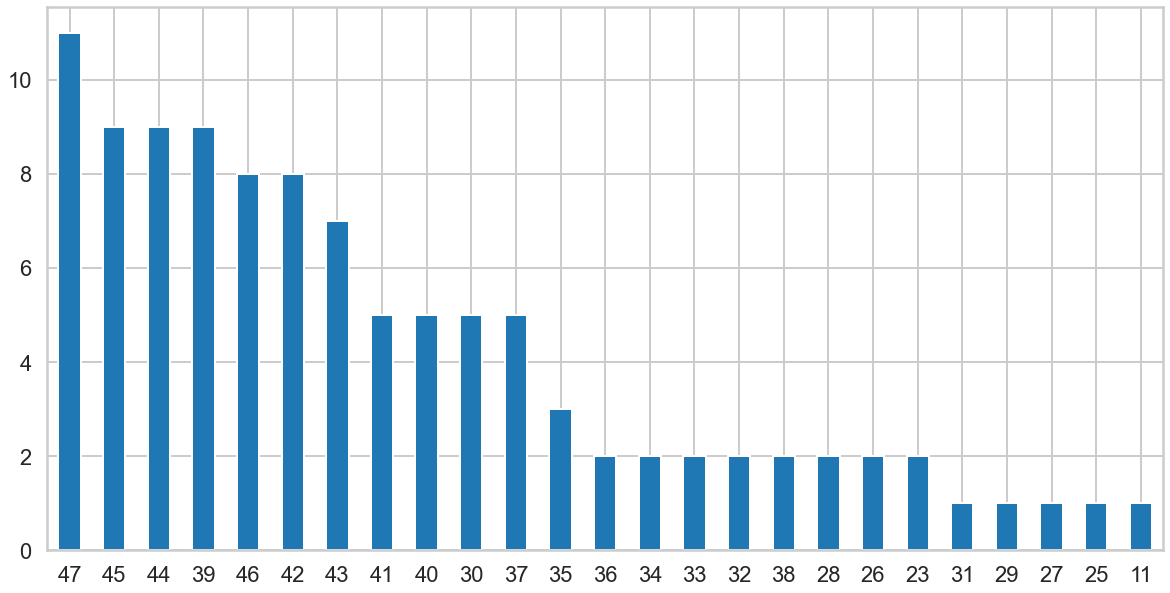

In [10]:
df1['five'].value_counts().plot(kind='bar', figsize=(20,10), rot=0)
# Plotting data in form of bar chart, showing the frequency of each number

In [11]:
df1.corr()     # Showing the correlation between items of columns
               # Of course, correlation of 71% [two&three] can mean nothing at all

,one,two,three,four,five,mega
one,1.000000,0.665549,0.437847,0.256215,0.183781,-0.080061
two,0.665549,1.000000,0.716594,0.399380,0.245979,-0.105619
three,0.437847,0.716594,1.000000,0.648416,0.434342,-0.131767
four,0.256215,0.399380,0.648416,1.000000,0.697801,-0.198955
five,0.183781,0.245979,0.434342,0.697801,1.000000,-0.113342
mega,-0.080061,-0.105619,-0.131767,-0.198955,-0.113342,1.000000
